## Step 1: Load and display data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("S2_DataFile.csv")

In [3]:
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


In [4]:
df.shape

(500, 5)

## Step 2: Preprocessing

In [5]:
# 1. Check data type
# Check TRAN_TIME field
print(df['TRAN_TIME'].dtypes)

object


In [6]:
# Convert về dạng DateTime
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'],format='%d/%m/%Y %H:%M')

In [7]:
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [8]:
# In kiểu dữ liệu
print(df['TRAN_TIME'].dtype)
# Check AMOUNT
print(df['AMOUNT'].dtype)

datetime64[ns]
int64


In [9]:
# 2. Describe data
# Check tổng quan dữ liệu
df['AMOUNT'].describe()


count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64

In [10]:
# Process error rows:
# Tạo mask để lấy các bản ghi hợp lệ
mask = df['AMOUNT'] > 0

In [11]:
# Lấy các bản ghi không lỗi
df = df[mask]
print(df.describe())

             AMOUNT
count  4.980000e+02
mean   3.547383e+06
std    1.605310e+07
min    1.000000e+01
25%    8.418000e+04
50%    1.006600e+06
75%    3.000000e+06
max    3.000000e+08


In [12]:
# cần thống kê số giao dịch theo giờ trong ngày => tạo ra 1 cột TRAN_HOUR – giờ giao dịch của khách hàng
# Tạo cột giờ
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')

In [13]:
df[['TRAN_HOUR','TRAN_TIME']]

,TRAN_HOUR,TRAN_TIME
0,01,2019-01-12 01:11:00
1,11,2019-01-12 11:01:00
2,01,2019-01-12 01:11:00
3,06,2019-01-12 06:50:00
4,01,2019-01-12 01:11:00
...,...,...
495,08,2019-01-12 08:45:00
496,21,2019-04-11 21:13:00
497,10,2019-01-12 10:53:00
498,08,2019-01-12 08:58:00


## STEP 3: Analyze & Visualize data

In [14]:
# Let's show 3 chart types which are important for manager
# Chart 1: BIỂU ĐỒ PIE VỀ TỶ LỆ SÔ TIỀN GIAO DỊCH TRÊN CÁC KÊNH
# Thể hiện rằng kênh giao dịch nào khách hàng dùng nhiều, kênh nào dùng ít để từ đó Ngân hàng có các chiến lược kinh doanh khác nhau.
# Thực hiện group by channel và tính tổng số tiền giao dịch
sum_AMT_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')
print('SUM AMOUNT BY CHANNELS:\n', sum_AMT_byChannel)

df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print('df_plot:\n',df_plot)

SUM AMOUNT BY CHANNELS:
   CHANNEL_ID  SUM_AMT_BY_CHN
0        ATM       179502250
1   INTERNET       768629241
2     MOBILE       818465352
df_plot:
             SUM_AMT_BY_CHN
CHANNEL_ID                
ATM              179502250
INTERNET         768629241
MOBILE           818465352


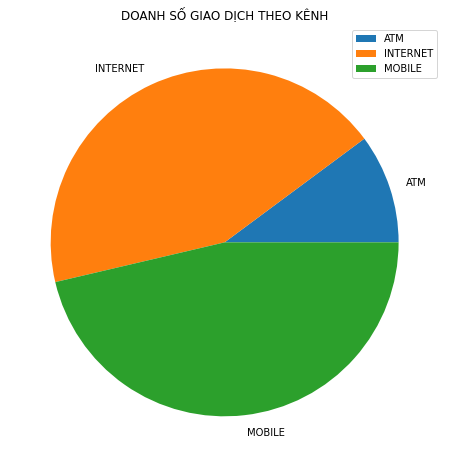

In [15]:
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHN',subplots=True, figsize=(8, 8))
# # TRANG TRÍ VÀ HIEN THI BIEU DO
plt.title("DOANH SỐ GIAO DỊCH THEO KÊNH")
plt.ylabel("")
plt.show()

In [16]:
# Chart 2: BIỂU ĐỒ CỘT VỀ SỐ LƯỢNG VÀ DOANH SỐ GIAO DỊCH THEO KÊNH
# tìm hiểu Số lượng giao dịch và Doanh số thu được của mỗi kênh để phân tích dữ liệu và tìm hiểu xem kênh nào có hiệu quả hoạt động tốt nhất
# quy Doanh số và Số lượng giao dịch về tỷ lệ % của để so sánh mức độ tương quan
# VE BIEU DO DANH DOANH SO VA SO LUONG GIAO DICH TREN CAC KENH GIAO DICH
count_byChannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
print('COUNT BY CHANNELS:\n',count_byChannel)
df_plot2 = sum_AMT_byChannel.merge(count_byChannel, on=['CHANNEL_ID'])
print('df_plot 2:\n',df_plot2)
df_plot2 = df_plot2.set_index('CHANNEL_ID')
print('df_plot 2:\n',df_plot2)

COUNT BY CHANNELS:
   CHANNEL_ID  COUNTS
0        ATM      98
1   INTERNET      72
2     MOBILE     328
df_plot 2:
   CHANNEL_ID  SUM_AMT_BY_CHN  COUNTS
0        ATM       179502250      98
1   INTERNET       768629241      72
2     MOBILE       818465352     328
df_plot 2:
             SUM_AMT_BY_CHN  COUNTS
CHANNEL_ID                        
ATM              179502250      98
INTERNET         768629241      72
MOBILE           818465352     328


In [17]:
# Quy đổi dữ liệu Doanh số về phần trăm để biểu diễn tính tương quan của dữ liệu
max_amt = df_plot2['SUM_AMT_BY_CHN'].max()
print('MAX AMOUNT:\n', max_amt)
df_plot2['%_DOANHSO'] =df_plot2['SUM_AMT_BY_CHN']*100/max_amt
print('DOANH SO:\n', df_plot2['%_DOANHSO'])
# Quy đổi dữ liệu Số lượng giao dịch về phần trăm để biểu diễn tính tương quan của dữ liệu
max_count = df_plot2['COUNTS'].max()
print('MAX COUNTS:\n',max_count)
df_plot2['%_SOLUONG'] = df_plot2['COUNTS'] * 100 / max_count
print('SO LUONG:\n',df_plot2)

MAX AMOUNT:
 818465352
DOANH SO:
 CHANNEL_ID
ATM          21.931564
INTERNET     93.911030
MOBILE      100.000000
Name: %_DOANHSO, dtype: float64
MAX COUNTS:
 328
SO LUONG:
             SUM_AMT_BY_CHN  COUNTS   %_DOANHSO   %_SOLUONG
CHANNEL_ID                                                
ATM              179502250      98   21.931564   29.878049
INTERNET         768629241      72   93.911030   21.951220
MOBILE           818465352     328  100.000000  100.000000


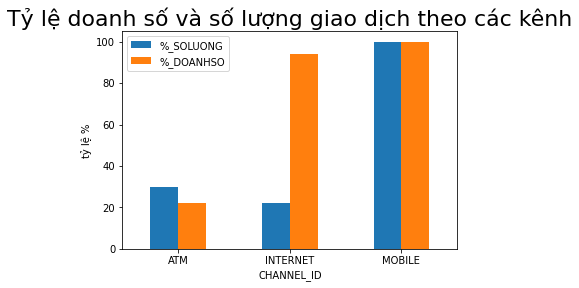

In [18]:
df_plot2.plot.bar( y=['%_SOLUONG','%_DOANHSO'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize=22)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)
 
plt.show()

In [19]:
# Chart 3: SỐ LIỆU GIAO DỊCH TRUNG BÌNH TRONG TỪNG GIỜ TRONG NGÀY
# tổng hợp số liệu và biểu diễn dữ liệu thành dạng đồ thị đường lưu lượng giao dịch trung bình trong ngày theo giờ giao dịch để xem đối với mỗi kênh hành vi giao dịch có gì khác biệt
# VE BIEU DO LUU LUONG GIAO DICH CÁC KENH TRUNG BINH THEO GIO MOI NGAY
# Tính số ngày trong dữ liệu
number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
print('Max_days:\n',df['TRAN_TIME'].max().date())
print('Min_days:\n',df['TRAN_TIME'].min().date())
print(number_of_days)

Max_days:
 2019-04-11
Min_days:
 2019-01-12
89


In [20]:
# Trích ra 2 cột kênh và giờ
df = df[['CHANNEL_ID', 'TRAN_HOUR']]

In [21]:
# Group và tính số lượng từng kênh trong từng giờ
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')
print('COUNT BY CNN TIME:\n', count_by_CNNTime)
# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['TRAN_HOUR'], columns=['CHANNEL_ID'])
print('Pivot table df_plot3:\n', df_plot3)

COUNT BY CNN TIME:
    CHANNEL_ID TRAN_HOUR  COUNTS_CNNTIME
0         ATM        06              17
1         ATM        07               9
2         ATM        08              19
3         ATM        09               6
4         ATM        10              19
5         ATM        11              10
6         ATM        12               2
7         ATM        13               6
8         ATM        14               3
9         ATM        21               7
10   INTERNET        00               1
11   INTERNET        01               3
12   INTERNET        06               3
13   INTERNET        07               3
14   INTERNET        08               7
15   INTERNET        09               9
16   INTERNET        10               6
17   INTERNET        11               7
18   INTERNET        12               8
19   INTERNET        13               7
20   INTERNET        14               2
21   INTERNET        20               1
22   INTERNET        21               8
23   INTERNET       

In [22]:
# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)
print('After filled NaN:\n', df_plot3)

After filled NaN:
 CHANNEL_ID   ATM  INTERNET  MOBILE
TRAN_HOUR                         
00           0.0       1.0     1.0
01           0.0       3.0   194.0
02           0.0       0.0     1.0
04           0.0       0.0     1.0
06          17.0       3.0     4.0
07           9.0       3.0     4.0
08          19.0       7.0    19.0
09           6.0       9.0    18.0
10          19.0       6.0    18.0
11          10.0       7.0     7.0
12           2.0       8.0     9.0
13           6.0       7.0    11.0
14           3.0       2.0    15.0
15           0.0       0.0     3.0
20           0.0       1.0     1.0
21           7.0       8.0    13.0
22           0.0       5.0     6.0
23           0.0       2.0     3.0


In [23]:
# Tính giá trị trung bình theo ngày
df_plot3['ATM']  = df_plot3['ATM'] / number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET'] / number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE'] / number_of_days
print('After calculate avg:\n', df_plot3)

After calculate avg:
 CHANNEL_ID       ATM  INTERNET    MOBILE
TRAN_HOUR                               
00          0.000000  0.011236  0.011236
01          0.000000  0.033708  2.179775
02          0.000000  0.000000  0.011236
04          0.000000  0.000000  0.011236
06          0.191011  0.033708  0.044944
07          0.101124  0.033708  0.044944
08          0.213483  0.078652  0.213483
09          0.067416  0.101124  0.202247
10          0.213483  0.067416  0.202247
11          0.112360  0.078652  0.078652
12          0.022472  0.089888  0.101124
13          0.067416  0.078652  0.123596
14          0.033708  0.022472  0.168539
15          0.000000  0.000000  0.033708
20          0.000000  0.011236  0.011236
21          0.078652  0.089888  0.146067
22          0.000000  0.056180  0.067416
23          0.000000  0.022472  0.033708


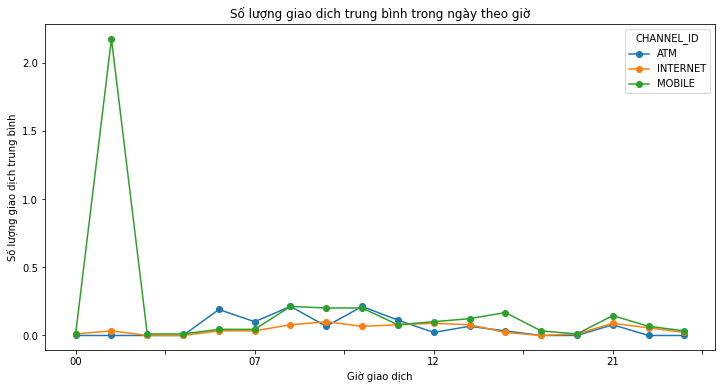

In [24]:
# Vẽ biểu đồ
df_plot3.plot(y=['ATM', 'INTERNET', 'MOBILE'], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
 
plt.show()